In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm import tqdm

In [3]:
def get_losses(data):
    tl = []
    vl = []

    for i in df:
        if 'train_loss' in i:
            tl.append(float(i.split("train_loss=")[1].split("]")[0]))

        if 'valid_loss' in i:
            vl.append(float(i.split("valid_loss=")[1].split("]")[0]))
    print("Lengths", len(tl), len(vl))
    return tl, vl

## BTC

Lengths 81 81


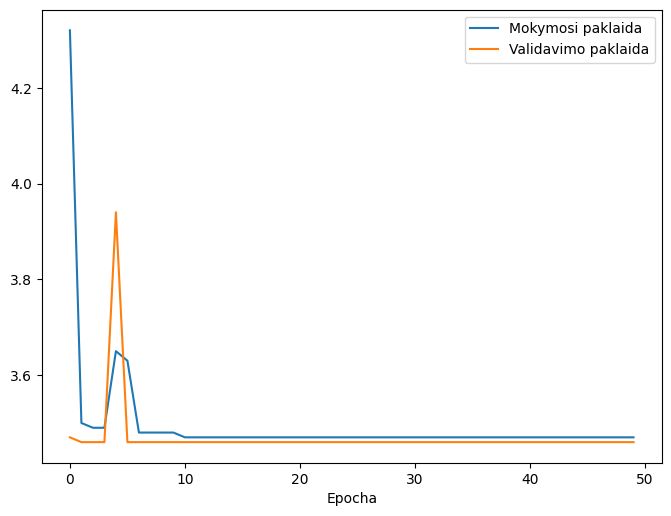

In [7]:
df = pd.read_fwf('training_logs/BTC_images_100_epoch_10000.txt').INTRO.values
btc_tl, btc_vl = get_losses(df)
n = 50
ids = [i for i in range(n)]

plt.figure(figsize=(8, 6), dpi=100)
plt.xlabel("Epocha")
plt.plot(ids, btc_tl[:n], label = 'Mokymosi paklaida')
plt.plot(ids, btc_vl[:n], label = 'Validavimo paklaida')
plt.legend(loc="upper right")
# plt.savefig('image_loss.png', dpi=100)

In [8]:
btc_vl

[3.47,
 3.46,
 3.46,
 3.46,
 3.94,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46,
 3.46]

## ETH

Lengths 50 50


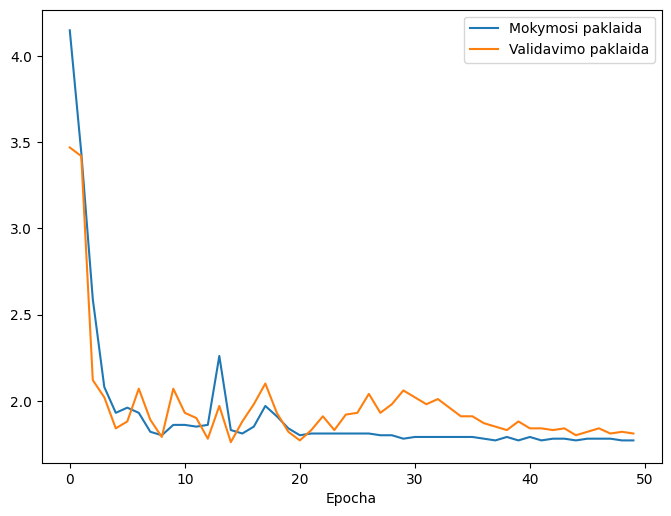

In [5]:
df = pd.read_fwf('training_logs/ETH_images_50_epoch_10000.txt').INTRO.values
eth_tl, eth_vl = get_losses(df)
n = len(eth_tl)
ids = [i for i in range(n)]
plt.figure(figsize=(8, 6), dpi=100)
plt.xlabel("Epocha")
plt.plot(ids, eth_tl[:n], label = 'Mokymosi paklaida')
plt.plot(ids, eth_vl[:n], label = 'Validavimo paklaida')
plt.legend(loc="upper right")
plt.savefig('eth_mage_loss.png', dpi=100)

## XRP

Lengths 50 50


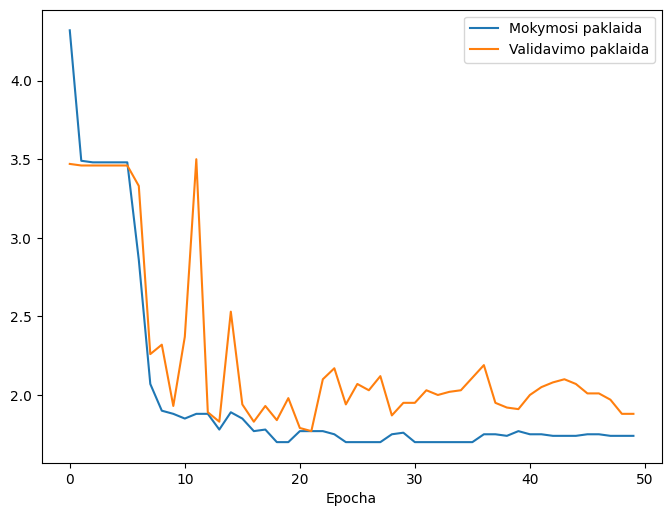

In [88]:
df = pd.read_fwf('training_logs/XRP_images_50_epoch_10000.txt').INTRO.values
eth_tl, eth_vl = get_losses(df)
n = len(eth_tl)
ids = [i for i in range(n)]
plt.figure(figsize=(8, 6), dpi=100)
plt.xlabel("Epocha")
plt.plot(ids, eth_tl[:n], label = 'Mokymosi paklaida')
plt.plot(ids, eth_vl[:n], label = 'Validavimo paklaida')
plt.legend(loc="upper right")
plt.savefig('xrp_mage_loss.png', dpi=100)

# Timeseries CLIP

In [84]:
def parse_output(filename, imagepath):
    file = open(filename,mode='r')
    df = file.read()
    file.close()
    
    trains = []
    valids = []
    
    byepoch = df.split('Epoch')
    for epoch in tqdm(byepoch[1:]):
        a = []
        b = []
        byline = epoch.split('\n')
        for i in byline:
            if 'train_loss' in i:
                a.append(float(i.split("train_loss=")[1].split("]")[0]))
            if 'valid_loss' in i:
                b.append(float(i.split("valid_loss=")[1].split("]")[0]))
        trains.append(a[-1])
        valids.append(b[-1])
        
    n = len(trains)
    ids = [i for i in range(n)]
    plt.figure(figsize=(8, 6), dpi=100)
    plt.xlabel("Epocha")
    plt.plot(ids, trains[:n], label = 'Mokymosi paklaida')
    plt.plot(ids, valids[:n], label = 'Validavimo paklaida')
    plt.legend(loc="upper right")
    plt.savefig(imagepath, dpi=100)
    

100%|█████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 345.41it/s]


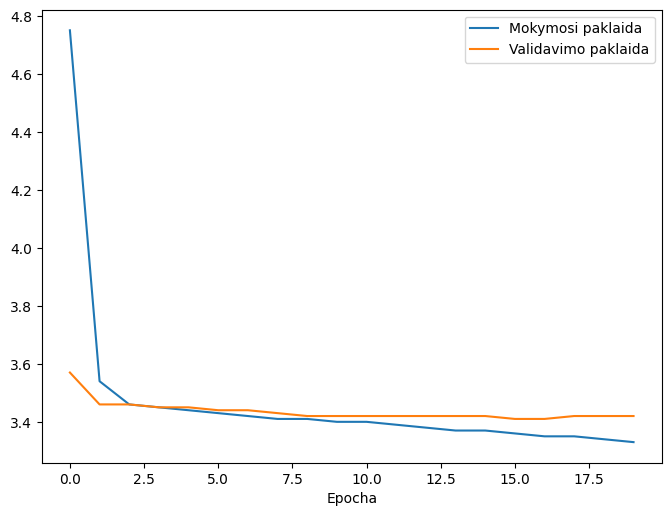

In [85]:
parse_output('training_logs/BTC_100000_training.txt', 'btc_ts_loss.png')

100%|█████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 354.46it/s]


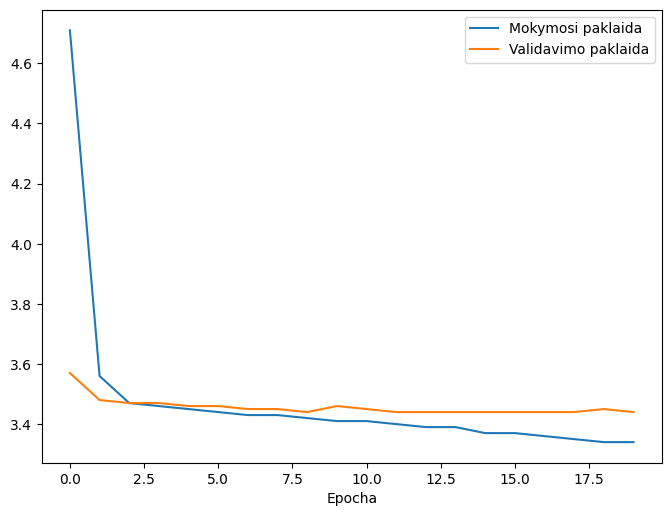

In [86]:
parse_output('training_logs/ETH_100000_training.txt', 'eth_ts_loss.png')

100%|█████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 351.76it/s]


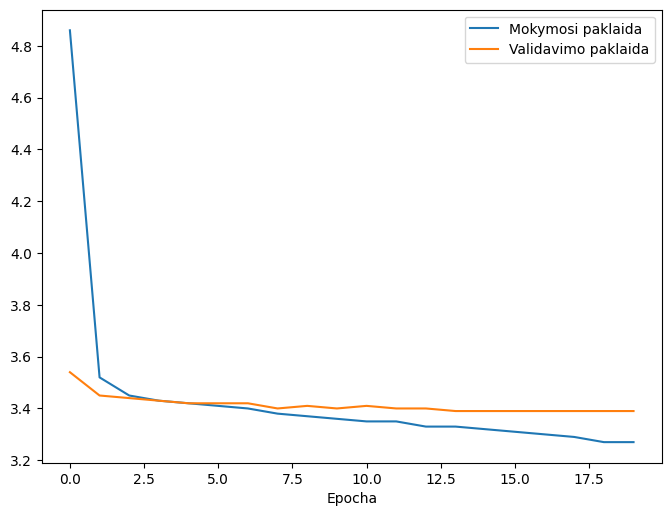

In [87]:
parse_output('training_logs/XRP_100000_training.txt', 'xrp_ts_loss.png')